In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install xgboost

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
full_data=pd.concat([train,test])#combining training and test data

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
test.head()

index country                                        description  \
0  41855      US  Sweet new oak stands out, giving this Cabernet...   
1  10328  France  Charming raspberry aromas intertwine with scen...   
2  60094      US  Ripe blackberry, leather and soy show on the n...   
3  48333      US  White flowers and wild anise give this a crisp...   
4  14498      US  Pinot Gris has been making inroads in Washingt...   

  designation     points  price      province               region_1  \
0          3D  95.036469    NaN    California             St. Helena   
1    Heluicum  90.966405    NaN  Rhône Valley  Collines Rhôdaniennes   
2      Estate  88.964358    NaN    California      Santa Ynez Valley   
3         NaN  89.960356    NaN    California           Sonoma Coast   
4         NaN  88.075501    NaN    Washington   Columbia Valley (WA)   

          region_2       taster_name taster_twitter_handle  \
0             Napa               NaN                   NaN   
1              NaN               NaN                   NaN   
2    Central Coast     Matt Kettmann         @mattkettmann   
3           Sonoma    Virginie Boone               @vboone   
4  Columbia Valley  Sean P. Sullivan         @wawinereport   

                                               title             variety  \
0  Salvestrin 2007 3D Cabernet Sauvignon (St. Hel...  CABERNET SAUVIGNON   
1                                                NaN               SYRAH   
2  Brave & Maiden 2013 Estate Cabernet Franc (San...      CABERNET FRANC   
3         Les Voleurs 2013 Chardonnay (Sonoma Coast)          CHARDONNAY   
4  Chateau Ste. Michelle 2015 Pinot Gris (Columbi...          PINOT GRIS   

                  winery  id  
0             Salvestrin   0  
1     Les Vins de Vienne   1  
2         Brave & Maiden   2  
3            Les Voleurs   3  
4  Chateau Ste. Michelle   4

In [5]:
train.head()

country                                        description  \
0  Portugal  This is a fine rich balanced wine. It has ripe...   
1    France  A solid, chunky wine, with a structure that is...   
2    France  This is powerful and concentrated, with the hi...   
3        US  Rich, ripe and oaky, this Petite Sirah charms ...   
4        US  This wine is a unique in the state blend and f...   

                 designation     points  price    province  \
0         Vila Santa Reserva  88.870874   20.0  Alentejano   
1                        NaN  88.041695   28.0    Bordeaux   
2                        NaN  94.085021  130.0    Bordeaux   
3          Thompson Vineyard  89.869797   34.0  California   
4  McKinley Springs Vineyard  89.017651   24.0  Washington   

               region_1         region_2       taster_name  \
0                   NaN              NaN               NaN   
1    Lalande de Pomerol              NaN               NaN   
2         Saint-Émilion              NaN               NaN   
3  Santa Barbara County    Central Coast               NaN   
4    Horse Heaven Hills  Columbia Valley  Sean P. Sullivan   

  taster_twitter_handle                                              title  \
0                   NaN                                                NaN   
1                   NaN                                                NaN   
2                   NaN                                                NaN   
3                   NaN  Jaffurs 2010 Thompson Vineyard Petite Sirah (S...   
4         @wawinereport  Syncline 2016 McKinley Springs Vineyard Rosé (...   

                    variety                        winery      id  
0            PORTUGUESE RED             J. Portugal Ramos   32027  
1  BORDEAUX-STYLE RED BLEND  Château Tour Grand Colombier   71079  
2  BORDEAUX-STYLE RED BLEND                Château Figeac   32440  
3              PETITE SIRAH                       Jaffurs  124405  
4                      ROSé                      Syncline   33649

In [6]:
full_data.shape

(258210, 15)

In [7]:
train.shape

(175000, 14)

In [8]:
test.shape

(83210, 15)

In [9]:
full_data.head()

country                                        description  \
0  Portugal  This is a fine rich balanced wine. It has ripe...   
1    France  A solid, chunky wine, with a structure that is...   
2    France  This is powerful and concentrated, with the hi...   
3        US  Rich, ripe and oaky, this Petite Sirah charms ...   
4        US  This wine is a unique in the state blend and f...   

                 designation      id  index     points  price    province  \
0         Vila Santa Reserva   32027    NaN  88.870874   20.0  Alentejano   
1                        NaN   71079    NaN  88.041695   28.0    Bordeaux   
2                        NaN   32440    NaN  94.085021  130.0    Bordeaux   
3          Thompson Vineyard  124405    NaN  89.869797   34.0  California   
4  McKinley Springs Vineyard   33649    NaN  89.017651   24.0  Washington   

               region_1         region_2       taster_name  \
0                   NaN              NaN               NaN   
1    Lalande de Pomerol              NaN               NaN   
2         Saint-Émilion              NaN               NaN   
3  Santa Barbara County    Central Coast               NaN   
4    Horse Heaven Hills  Columbia Valley  Sean P. Sullivan   

  taster_twitter_handle                                              title  \
0                   NaN                                                NaN   
1                   NaN                                                NaN   
2                   NaN                                                NaN   
3                   NaN  Jaffurs 2010 Thompson Vineyard Petite Sirah (S...   
4         @wawinereport  Syncline 2016 McKinley Springs Vineyard Rosé (...   

                    variety                        winery  
0            PORTUGUESE RED             J. Portugal Ramos  
1  BORDEAUX-STYLE RED BLEND  Château Tour Grand Colombier  
2  BORDEAUX-STYLE RED BLEND                Château Figeac  
3              PETITE SIRAH                       Jaffurs  
4                      ROSé                      Syncline

In [10]:
test.describe()

index        points  price            id
count   83210.000000  83210.000000    0.0  83210.000000
mean    70807.640680     88.086306    NaN  41604.500000
std     41392.557418      3.158733    NaN  24020.802287
min         0.000000     79.744779    NaN      0.000000
25%     35202.000000     85.965694    NaN  20802.250000
50%     70405.000000     87.981776    NaN  41604.500000
75%    105730.500000     90.092488    NaN  62406.750000
max    150928.000000    100.115926    NaN  83209.000000

In [11]:
train.describe()

points          price             id
count  175000.000000  175000.000000  175000.000000
mean       88.083987      34.304400   70684.047240
std         3.157001      38.398146   41341.638798
min        79.636128       4.000000       1.000000
25%        85.971283      16.000000   35020.000000
50%        87.981631      25.000000   70256.500000
75%        90.085631      40.000000  105550.250000
max       100.220603    2500.000000  150929.000000

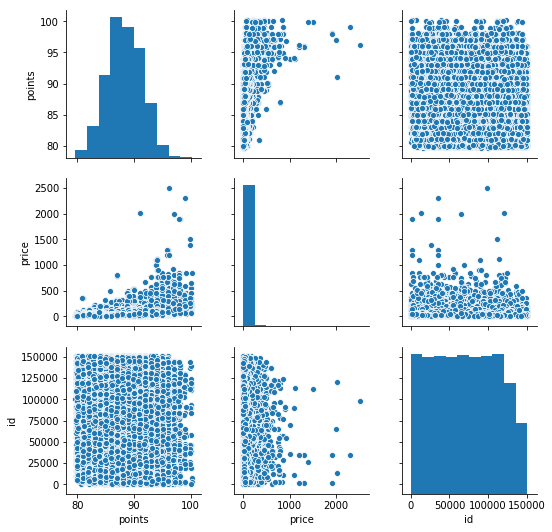

In [12]:
sns.pairplot(train)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 14 columns):
country                  174953 non-null object
description              175000 non-null object
designation              122734 non-null object
points                   175000 non-null float64
price                    175000 non-null float64
province                 174953 non-null object
region_1                 146466 non-null object
region_2                 75394 non-null object
taster_name              65509 non-null object
taster_twitter_handle    62190 non-null object
title                    82189 non-null object
variety                  174999 non-null object
winery                   175000 non-null object
id                       175000 non-null int64
dtypes: float64(2), int64(1), object(11)
memory usage: 18.7+ MB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83210 entries, 0 to 83209
Data columns (total 15 columns):
index                    83210 non-null int64
country                  83193 non-null object
description              83210 non-null object
designation              58386 non-null object
points                   83210 non-null float64
price                    0 non-null float64
province                 83193 non-null object
region_1                 69327 non-null object
region_2                 35602 non-null object
taster_name              30970 non-null object
taster_twitter_handle    29369 non-null object
title                    38786 non-null object
variety                  83210 non-null object
winery                   83210 non-null object
id                       83210 non-null int64
dtypes: float64(2), int64(2), object(11)
memory usage: 9.5+ MB


In [15]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258210 entries, 0 to 83209
Data columns (total 15 columns):
country                  258146 non-null object
description              258210 non-null object
designation              181120 non-null object
id                       258210 non-null int64
index                    83210 non-null float64
points                   258210 non-null float64
price                    175000 non-null float64
province                 258146 non-null object
region_1                 215793 non-null object
region_2                 110996 non-null object
taster_name              96479 non-null object
taster_twitter_handle    91559 non-null object
title                    120975 non-null object
variety                  258209 non-null object
winery                   258210 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 31.5+ MB


In [16]:
#Convert from categorical to numerical 
full_data['country']=full_data['country'].astype('category').cat.codes
full_data['designation']=full_data['designation'].astype('category').cat.codes
full_data['index']=full_data['index'].astype('category').cat.codes
full_data['province']=full_data['province'].astype('category').cat.codes
full_data['region_1']=full_data['region_1'].astype('category').cat.codes
full_data['region_2']=full_data['region_2'].astype('category').cat.codes
full_data['taster_name']=full_data['taster_name'].astype('category').cat.codes
full_data['taster_twitter_handle']=full_data['taster_twitter_handle'].astype('category').cat.codes
full_data['title']=full_data['title'].astype('category').cat.codes
full_data['variety']=full_data['variety'].astype('category').cat.codes
full_data['winery']=full_data['winery'].astype('category').cat.codes

In [17]:
full_data.head()

country                                        description  designation  \
0       34  This is a fine rich balanced wine. It has ripe...        42041   
1       15  A solid, chunky wine, with a structure that is...           -1   
2       15  This is powerful and concentrated, with the hi...           -1   
3       44  Rich, ripe and oaky, this Petite Sirah charms ...        39632   
4       44  This wine is a unique in the state blend and f...        25325   

       id  index     points  price  province  region_1  region_2  taster_name  \
0   32027     -1  88.870874   20.0         8        -1        -1           -1   
1   71079     -1  88.041695   28.0        38       582        -1           -1   
2   32440     -1  94.085021  130.0        38       983        -1           -1   
3  124405     -1  89.869797   34.0        53      1014         1           -1   
4   33649     -1  89.017651   24.0       468       536         3           16   

   taster_twitter_handle  title  variety  winery  
0                     -1     -1      479    9470  
1                     -1     -1       62    4345  
2                     -1     -1       62    3564  
3                     -1  53573      443    9532  
4                     11  95520      522   15765

In [18]:
train_new=full_data.iloc[0:len(train),]
test_new=full_data.iloc[len(train):,]

In [19]:
test_new.shape

(83210, 15)

In [20]:
test.shape

(83210, 15)

In [21]:
test_new.head()

country                                        description  designation  \
0       44  Sweet new oak stands out, giving this Cabernet...          386   
1       15  Charming raspberry aromas intertwine with scen...        17995   
2       44  Ripe blackberry, leather and soy show on the n...        13908   
3       44  White flowers and wild anise give this a crisp...           -1   
4       44  Pinot Gris has been making inroads in Washingt...           -1   

   id  index     points  price  province  region_1  region_2  taster_name  \
0   0  21090  95.036469    NaN        53      1091         7           -1   
1   1   5288  90.966405    NaN       350       292        -1           -1   
2   2  30233  88.964358    NaN        53      1023         1           11   
3   3  24354  89.960356    NaN        53      1060        13           18   
4   4   7455  88.075501    NaN       468       300         3           16   

   taster_twitter_handle  title  variety  winery  
0                     -1  87601       82   14649  
1                     -1     -1      596   10714  
2                      6  12294       72    1925  
3                      9  61944      130   10716  
4                     11  20301      465    3153

In [22]:
train_new.head()

country                                        description  designation  \
0       34  This is a fine rich balanced wine. It has ripe...        42041   
1       15  A solid, chunky wine, with a structure that is...           -1   
2       15  This is powerful and concentrated, with the hi...           -1   
3       44  Rich, ripe and oaky, this Petite Sirah charms ...        39632   
4       44  This wine is a unique in the state blend and f...        25325   

       id  index     points  price  province  region_1  region_2  taster_name  \
0   32027     -1  88.870874   20.0         8        -1        -1           -1   
1   71079     -1  88.041695   28.0        38       582        -1           -1   
2   32440     -1  94.085021  130.0        38       983        -1           -1   
3  124405     -1  89.869797   34.0        53      1014         1           -1   
4   33649     -1  89.017651   24.0       468       536         3           16   

   taster_twitter_handle  title  variety  winery  
0                     -1     -1      479    9470  
1                     -1     -1       62    4345  
2                     -1     -1       62    3564  
3                     -1  53573      443    9532  
4                     11  95520      522   15765

In [23]:
train_new.columns

Index(['country', 'description', 'designation', 'id', 'index', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [24]:
train1_x=train_new[['country', 'designation', 'points', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery']]
train1_y=train_new[['price']]

In [25]:
train1_x


country  designation     points  province  region_1  region_2  \
0            34        42041  88.870874         8        -1        -1   
1            15           -1  88.041695        38       582        -1   
2            15           -1  94.085021        38       983        -1   
3            44        39632  89.869797        53      1014         1   
4            44        25325  89.017651       468       536         3   
5            41         5405  83.118679        66       196        -1   
6            15        10561  88.320513        38       131        -1   
7            22         2892  85.173533       374      1042        -1   
8            44           -1  85.908686        53       958        13   
9            22        22507  81.929514       437       887        -1   
10           15        34178  88.020404       337       341        -1   
11            9           -1  83.951573        98        -1        -1   
12           15        38686  89.998322       218      1006        -1   
13           44        42205  81.951946        53       841         1   
14           44        35877  92.885140        53      1022         1   
15            1        17069  85.764215       241       623        -1   
16           41        26112  87.160161       294       926        -1   
17            9        16859  87.973036        64        -1        -1   
18           22         6794  87.002542       292        27        -1   
19           44        13957  85.944287       286       465         4   
20            3        25157  82.907603        25      1080        -1   
21           18         2535  87.132911       368        -1        -1   
22           44        22501  87.885363       303      1293        17   
23           15        29740  88.081808       387       163        -1   
24           44           -1  84.961308        53      1023         1   
25           34        30266  84.964618       216        -1        -1   
26            3        13908  83.990775       439      1299        -1   
27           44        32338  92.214560        53       185         8   
28           22         5065  87.080076       323        70        -1   
29           44           -1  88.969718       468      1288         3   
...         ...          ...        ...       ...       ...       ...   
174970        1        16859  92.084757       241       673        -1   
174971       22        14506  88.160619       220       473        -1   
174972       44        13908  91.001806       303      1298        17   
174973        1        12397  89.795499       241      1152        -1   
174974       44        40015  89.910858       286       812         5   
174975       15        41905  85.065287       204      1220        -1   
174976       44           -1  86.103450        53       785         7   
174977       44         6007  89.968911       468       300         3   
174978       44        43306  85.907472        53       168         0   
174979       15           -1  89.967848        38       191        -1   
174980       22          738  86.935671       426       121        -1   
174981       44           -1  86.936598        53       706         1   
174982        4         4216  89.123746        48        -1        -1   
174983       15        21356  90.965702       337       341        -1   
174984       44        32456  87.906367       468       536         3   
174985        1        35295  86.057443       241       673        -1   
174986       41        11398  82.907838        66       196        -1   
174987       22        24759  87.946611       323        69        -1   
174988       44        35904  91.949851       303       919        17   
174989       41         9736  90.974833       294       922        -1   
174990       44        42458  83.771179        53       785         7   
174991       44        42446  93.140820        53       537         7   
174992       41        21593  91.854095       144       920       

In [26]:
train1_y

price
0        20.0
1        28.0
2       130.0
3        34.0
4        24.0
5        13.0
6        35.0
7        42.0
8        38.0
9        14.0
10       14.0
11        8.0
12       24.0
13       16.0
14       38.0
15       17.0
16       15.0
17       30.0
18       50.0
19       20.0
20       10.0
21       17.0
22       50.0
23       12.0
24       20.0
25        7.0
26       40.0
27       18.0
28       40.0
29       45.0
...       ...
174970   25.0
174971   30.0
174972   50.0
174973   10.0
174974   37.0
174975   14.0
174976   24.0
174977   10.0
174978   18.0
174979   18.0
174980   42.0
174981   13.0
174982   19.0
174983   15.0
174984   22.0
174985   18.0
174986   10.0
174987   40.0
174988   35.0
174989   19.0
174990   90.0
174991  105.0
174992   36.0
174993   55.0
174994   19.0
174995   55.0
174996   14.0
174997   10.0
174998   65.0
174999   50.0

[175000 rows x 1 columns]

# Split the data

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train1_x,train1_y , test_size=0.3, random_state=101)

In [29]:
from xgboost.sklearn import XGBClassifier  
from xgboost.sklearn import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [27]:
model = XGBClassifier()
model.fit(X_train, y_train)
#model.feature_importances_(train_features)

NameError: name 'XGBClassifier' is not defined

In [ ]:
predictions=model.predict(X_test)

# Train the model

In [127]:
from sklearn.ensemble import RandomForestRegressor 

In [131]:
rfr=RandomForestRegressor()
rfr=rfr.fit(X_train,y_train) 

/usr/lib/python3/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [132]:
predictions=rfr.predict(X_test)

In [138]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 10.24946476190476
MSE: 747.6501373333335
RMSE: 27.34319179125461


In [135]:
np.mean(predictions)

35.00851238095238

In [137]:
np.mean(train_new['price'])

34.3044

In [139]:
predictions

array([ 19.6,  24.3,  50. , ...,  68.9, 372.8,  29. ])

In [145]:
test1_x=test_new[['country', 'designation', 'points', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery']]

In [146]:
predictions_test=rfr.predict(test1_x)

In [149]:
np.mean(predictions_test)

34.68681288306694

In [148]:
predictions_df=pd.DataFrame({'id':range(len(test_new)),'price':predictions_test})

In [151]:
predictions_df.to_csv('predictions.csv',index=False)